In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import seaborn as sns


In [9]:
df = pd.read_csv('seattle-weather.csv')

In [10]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [11]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [12]:
df.duplicated().sum()

0

In [13]:
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [14]:
len(training_set)

1461

In [15]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [16]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [17]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [18]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 246.0957 - val_loss: 262.3255
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 115.0087 - val_loss: 179.1370
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 80.7507 - val_loss: 148.2048
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 70.3387 - val_loss: 126.9314
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 64.1992 - val_loss: 111.8765
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 59.4196 - val_loss: 100.9934
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 53.8867 - val_loss: 93.0594
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 52.9837 - val_loss: 87.4623
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 55.8568 - val_loss: 83.5288
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 54.1943 - val_loss: 80.5485
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 50.0441 - val_loss: 80.1936
Epoch 12/100
25/25 ━━━

In [20]:
his = pd.DataFrame(history.history)
his.head()


,loss,val_loss
0,208.420120,262.325500
1,101.909782,179.136993
2,77.881989,148.204758
3,67.220917,126.931366
4,61.578434,111.876472


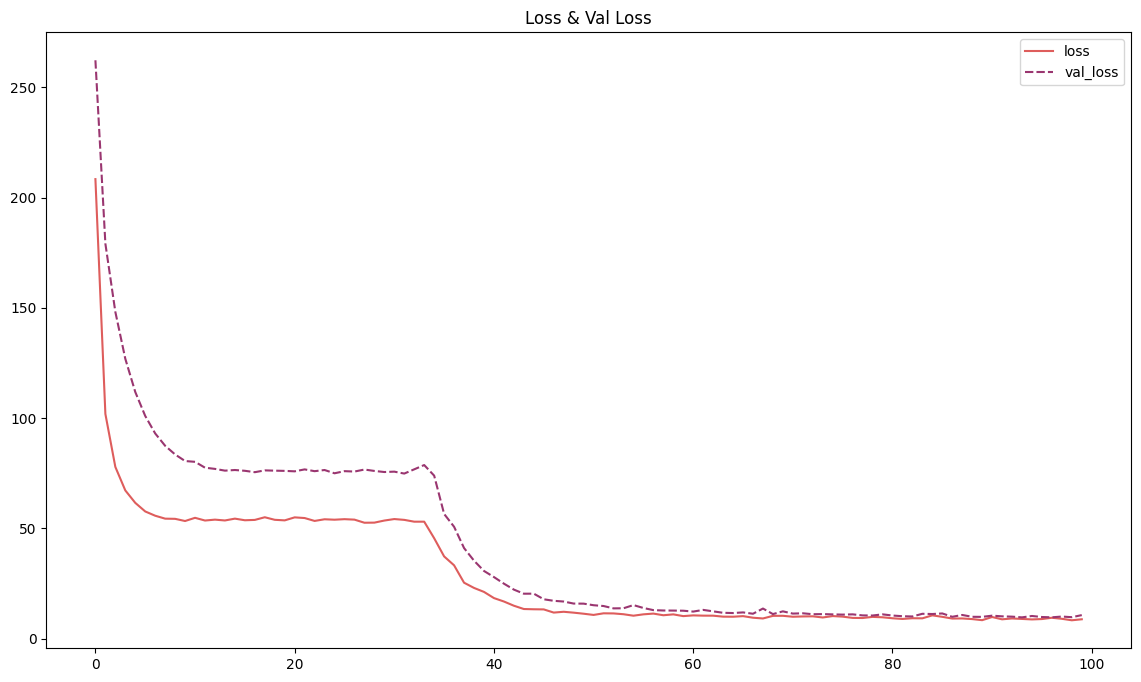

In [24]:
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(1,1,figsize=(14,8))
plt.subplot(1,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

In [25]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


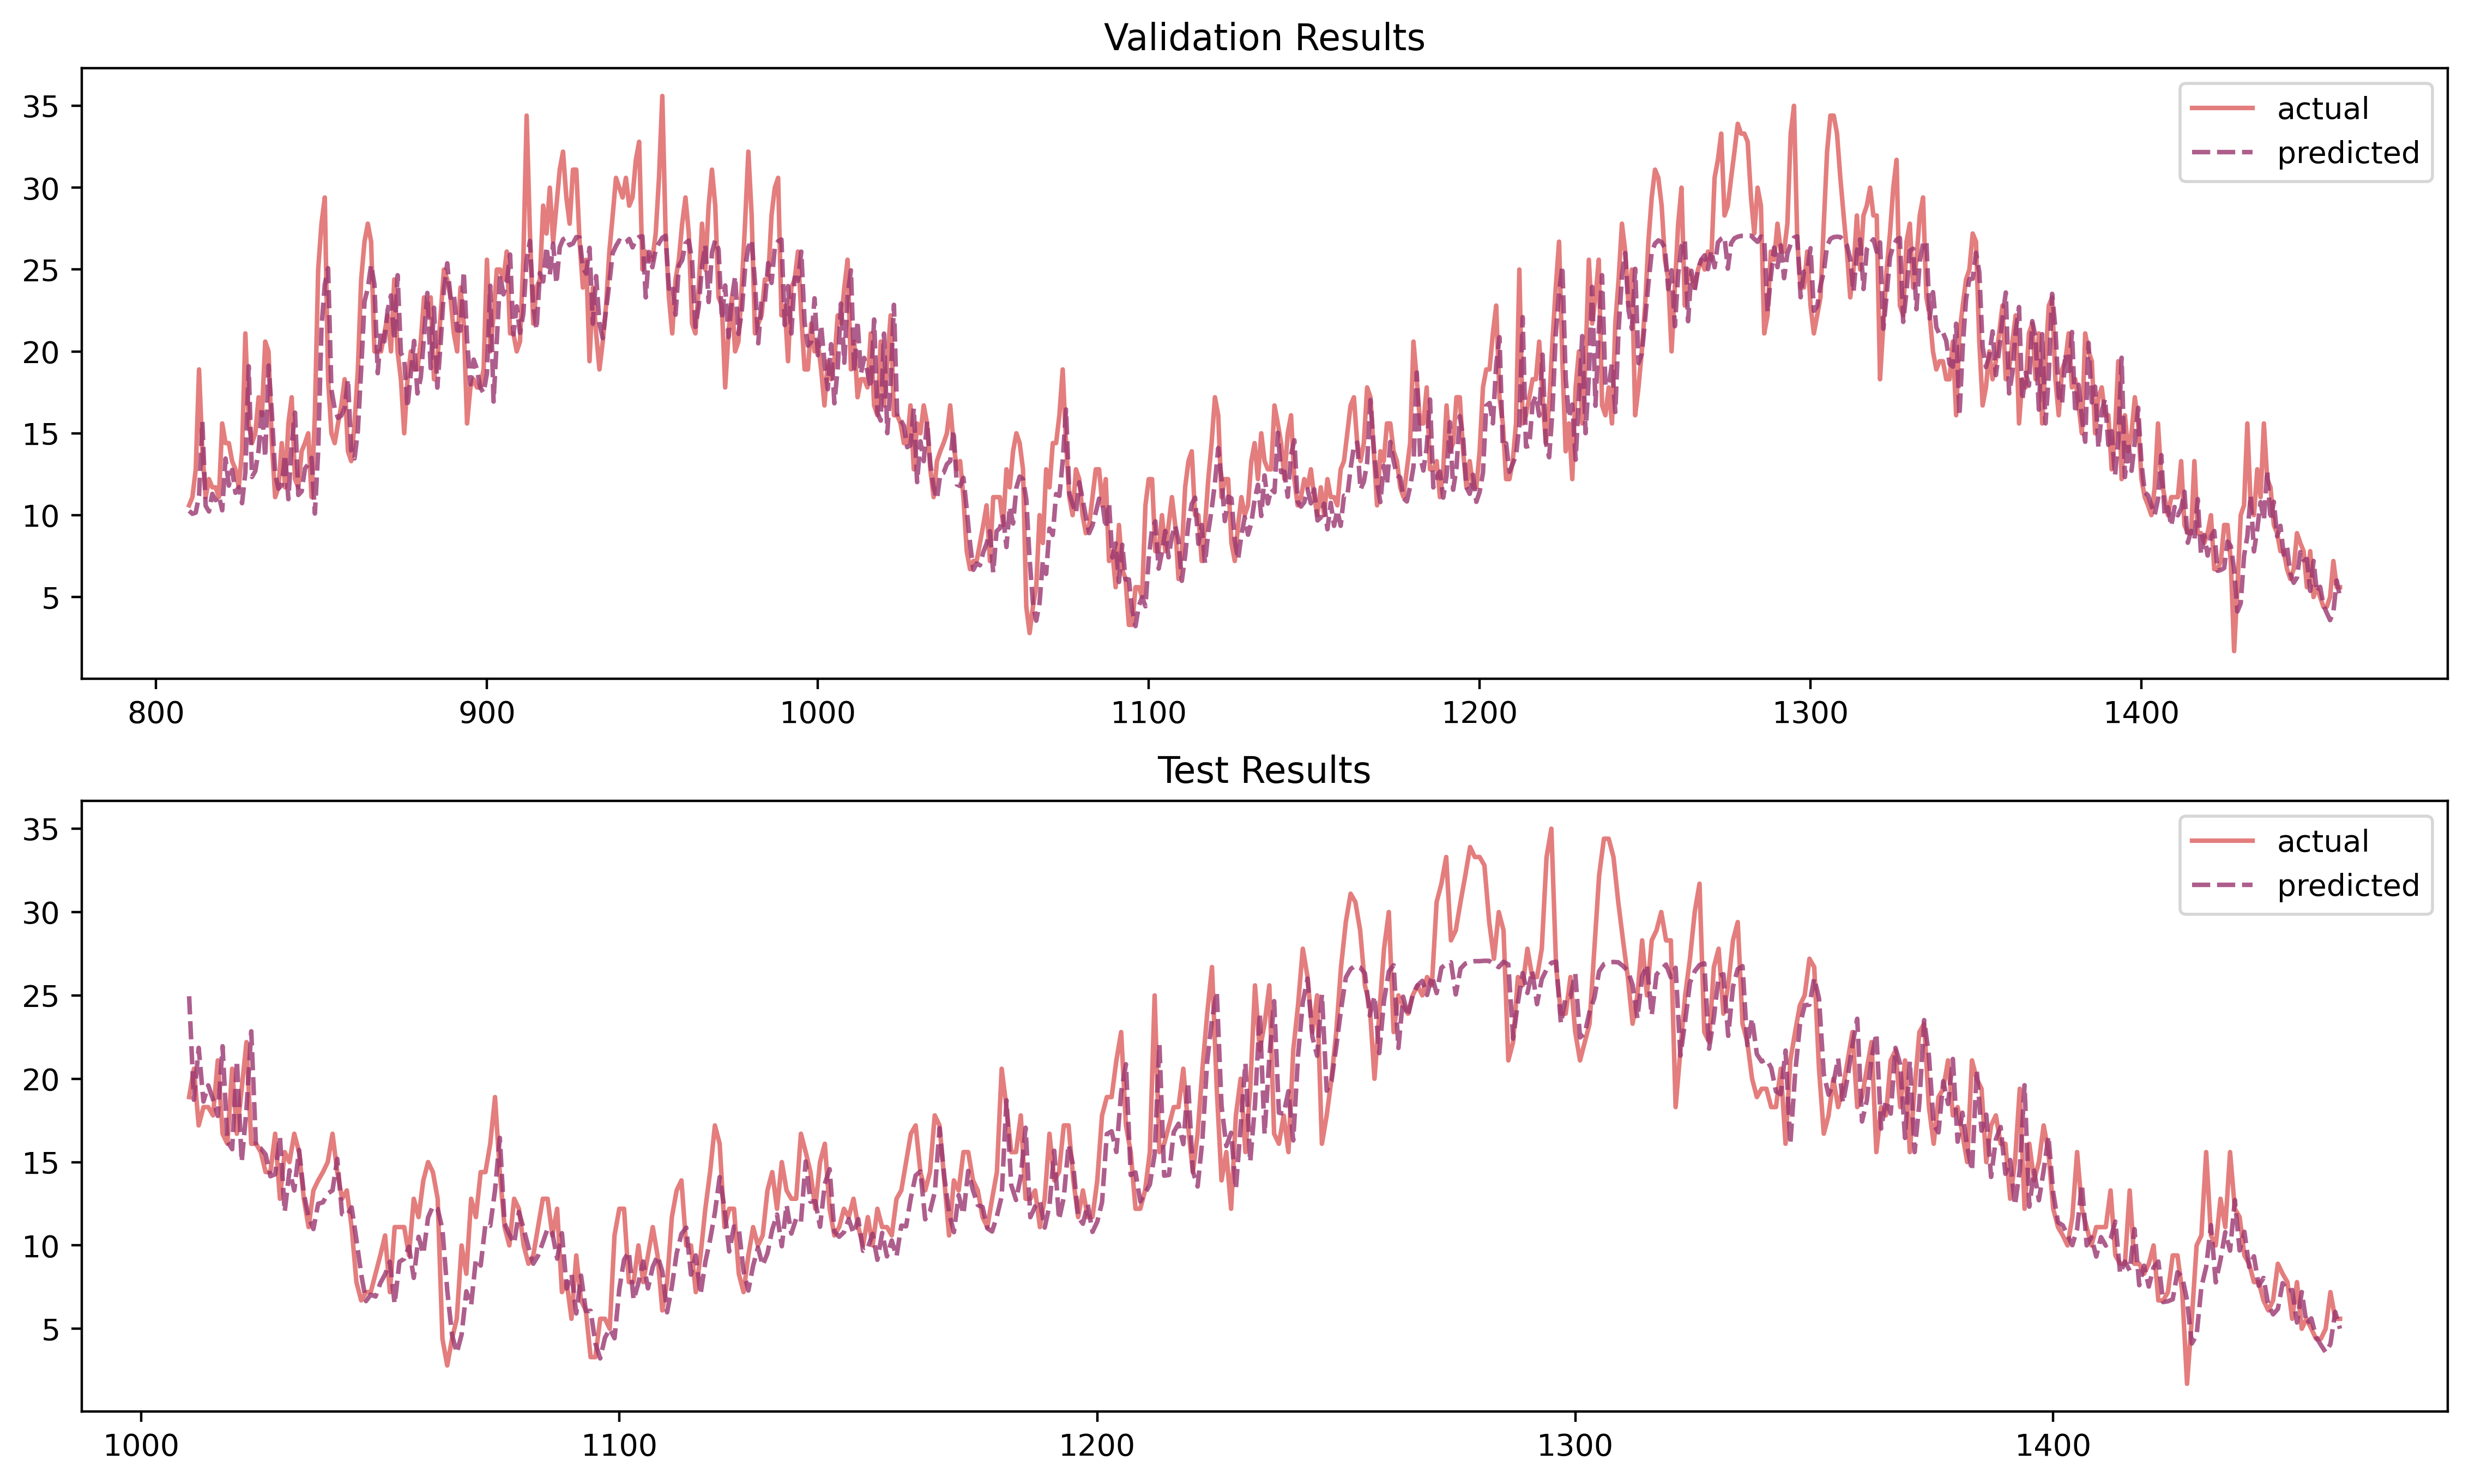

In [26]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);